<a href="https://colab.research.google.com/github/gayatri-b-07/ML-Project/blob/main/Crop%20type%20and%20crop%20yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Read CSV File**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/ML PROJECT/crop_yield.csv'

original_data = pd.read_csv(path)

Mounted at /content/drive


## **Exploratory Data Analysis (EDA) & DATA PREPROCESING**

In [ ]:
original_data.shape

(19689, 10)

In [ ]:
original_data.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
original_data.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [ ]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
original_data.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:
print(f"Unique Values in data")
for column in original_data.columns:
    print(f" '{column}': \t {len(original_data[column].unique())}")

Unique Values in data
 'Crop': 	 55
 'Crop_Year': 	 24
 'Season': 	 6
 'State': 	 30
 'Area': 	 13644
 'Production': 	 14016
 'Annual_Rainfall': 	 634
 'Fertilizer': 	 18598
 'Pesticide': 	 17405
 'Yield': 	 13551


Handling missing data

In [ ]:
original_data.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


Handling duplicate data

In [ ]:
original_data.duplicated().sum()

0

Encoding data using label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
for column in original_data.columns:
    if original_data[column].dtype == 'object':  # Check if the column is categorical
        original_data[column] = label_encoder.fit_transform(original_data[column])

In [ ]:
original_data.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997,4,2,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,1,1997,1,2,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,8,1997,1,2,796.0,22,2051.4,75755.32,246.76,0.238333
3,9,1997,4,2,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,11,1997,1,2,1739.0,794,2051.4,165500.63,539.09,0.420909


Scalling data using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
data = original_data.drop(['Crop','Season','State'], axis =1 )
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=original_data.index)
scaled_data.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,-1.866375,-0.144802,-0.062267,0.751197,-0.179880,-0.121745,-0.090128
1,-1.866375,-0.236473,-0.062464,0.751197,-0.247217,-0.219385,-0.090225
2,-1.866375,-0.244443,-0.062482,0.751197,-0.253072,-0.227875,-0.090763
3,-1.866375,-0.218707,0.419954,0.751197,-0.234167,-0.200462,5.872928
4,-1.866375,-0.243157,-0.062479,0.751197,-0.252127,-0.226504,-0.090555


In [ ]:
data = pd.concat([original_data[['Crop','Season','State']], scaled_data], axis=1)
data.head()

,Crop,Season,State,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,4,2,-1.866375,-0.144802,-0.062267,0.751197,-0.179880,-0.121745,-0.090128
1,1,1,2,-1.866375,-0.236473,-0.062464,0.751197,-0.247217,-0.219385,-0.090225
2,8,1,2,-1.866375,-0.244443,-0.062482,0.751197,-0.253072,-0.227875,-0.090763
3,9,4,2,-1.866375,-0.218707,0.419954,0.751197,-0.234167,-0.200462,5.872928
4,11,1,2,-1.866375,-0.243157,-0.062479,0.751197,-0.252127,-0.226504,-0.090555


## **DATA VISUALIZATION**

HeatMap

<Axes: >

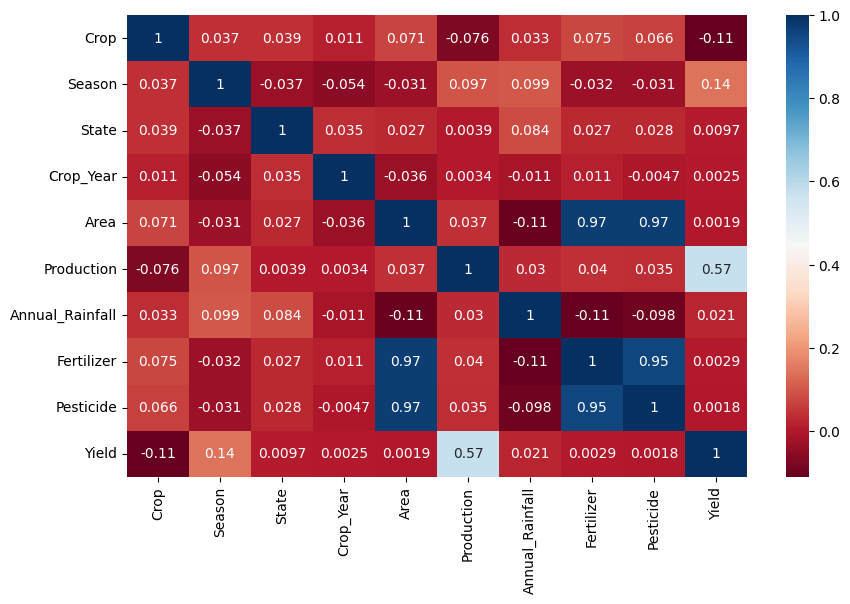

In [ ]:
#checking the corelation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

Outliers checking

Variable Name : CROP


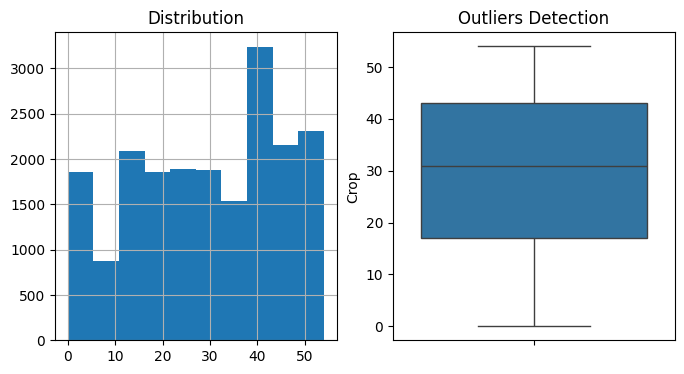



Variable Name : SEASON


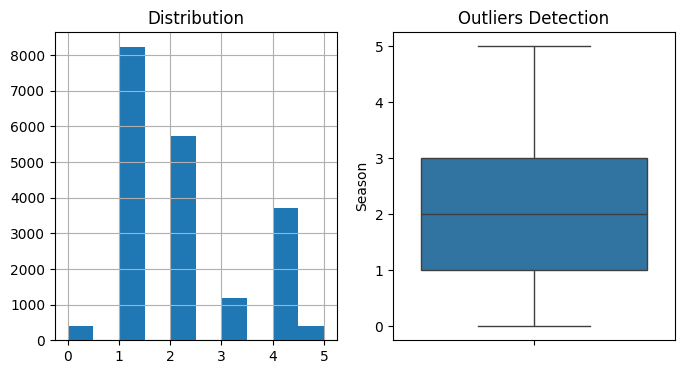



Variable Name : STATE


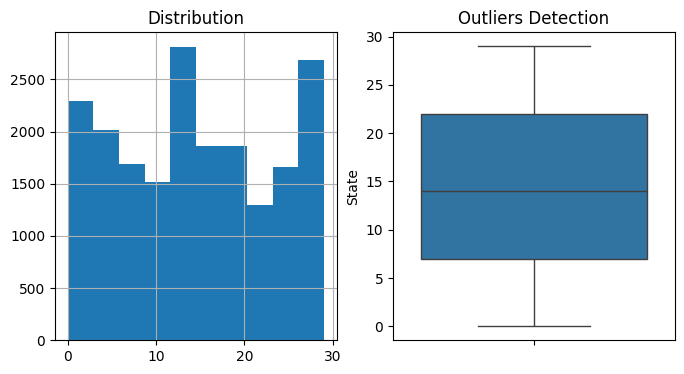



Variable Name : CROP_YEAR


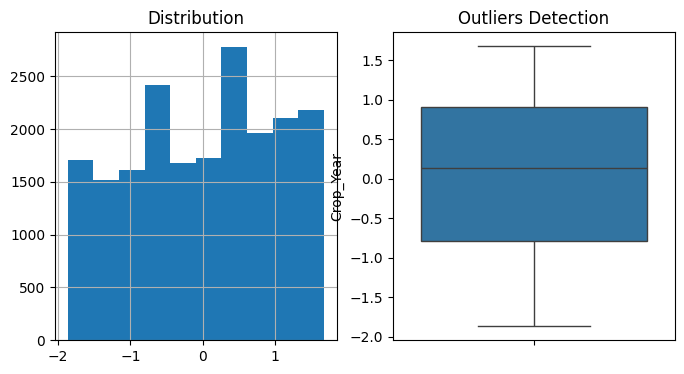



Variable Name : AREA


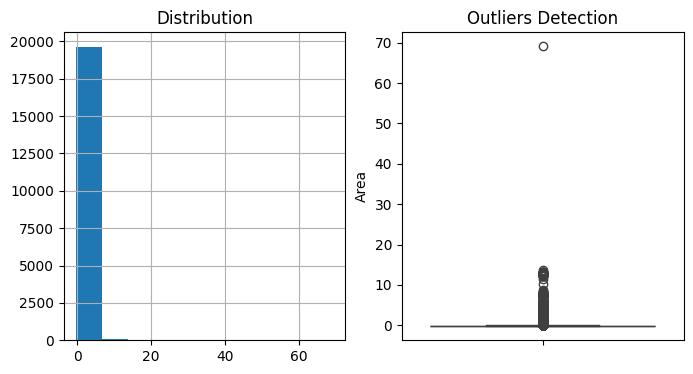



Variable Name : PRODUCTION


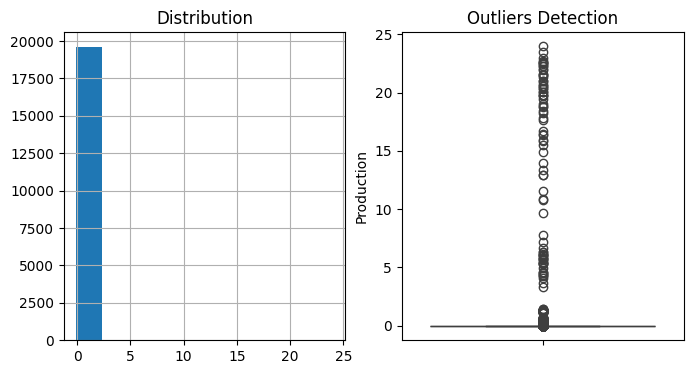



Variable Name : ANNUAL_RAINFALL


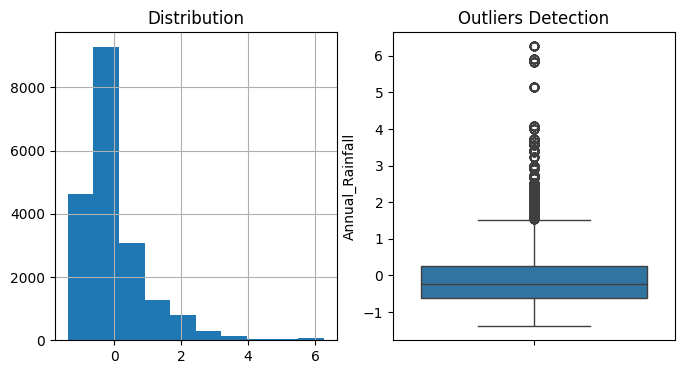



Variable Name : FERTILIZER


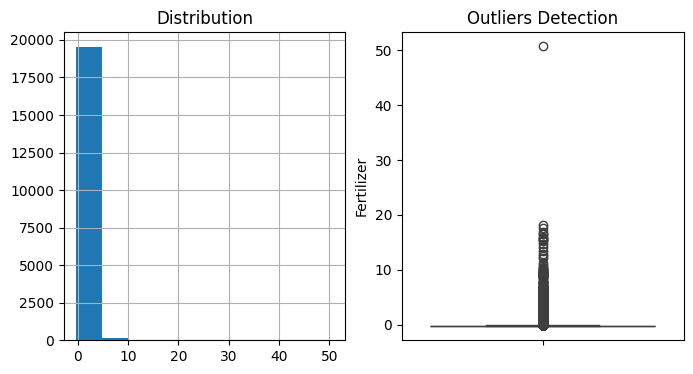

In [ ]:
#checking for outliers in the data
for i in data.columns[:-2]:
    print('Variable Name :',i.upper())
    fig, axes = plt.subplots(1,2,figsize=(8,4))
    axes[0].set_title('Distribution')
    axes[1].set_title('Outliers Detection')
    data[i].hist(ax=axes[0])
    sns.boxplot(data[i],ax=axes[1])
    plt.show()
    print('\n')

split the data

In [ ]:
X = original_data.drop(['Yield', 'Crop'], axis=1)
y_yield = original_data['Yield']
y_crop = original_data['Crop']
print('Input variables \n',X.head())
print('\nOutput Variable(crop)\n',y_crop.head())
print('\nOutput Variable(yield)\n',y_yield.head())

Input variables 
    Crop_Year  Season  State     Area  Production  Annual_Rainfall  Fertilizer  \
0       1997       4      2  73814.0       56708           2051.4  7024878.38   
1       1997       1      2   6637.0        4685           2051.4   631643.29   
2       1997       1      2    796.0          22           2051.4    75755.32   
3       1997       4      2  19656.0   126905000           2051.4  1870661.52   
4       1997       1      2   1739.0         794           2051.4   165500.63   

   Pesticide  
0   22882.34  
1    2057.47  
2     246.76  
3    6093.36  
4     539.09  

Output Variable(crop)
 0     0
1     1
2     8
3     9
4    11
Name: Crop, dtype: int64

Output Variable(yield)
 0       0.796087
1       0.710435
2       0.238333
3    5238.051739
4       0.420909
Name: Yield, dtype: float64


In [ ]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_crop_train, y_crop_test, y_yield_train, y_yield_test = train_test_split(X,y_crop, y_yield,test_size=0.2,random_state=2)
print('x_train = {}, x_test = {}, y_crop_train = {}, y_crop_test = {}, y_yield_train = {}, y_yield_test = {}'.format(X_train.shape,X_test.shape,y_crop_train.shape,y_crop_test.shape,y_yield_train.shape,y_yield_test.shape))

x_train = (15751, 8), x_test = (3938, 8), y_crop_train = (15751,), y_crop_test = (3938,), y_yield_train = (15751,), y_yield_test = (3938,)


## **Model Training**

In [ ]:
#import libraries for model training
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
# Define models for yield prediction (regression) and crop type recommendation (classification)
crop_models = {
    'SVC': SVC(kernel='rbf', random_state=42),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=20000),
    'XGBClassifier': XGBClassifier(random_state=42)
}

yield_models = {
    'SVR': SVR(kernel='rbf'),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'XGBRegressor': XGBRegressor(objective="reg:squarederror", random_state=42)
}

In [ ]:
# Evaluate crop type classification models
crop_results = {}
print(f"Crop Type Prediction")
for name, model in crop_models.items():
    model.fit(X_train, y_crop_train)
    y_crop_pred = model.predict(X_test)
    accuracy = accuracy_score(y_crop_test, y_crop_pred) * 100
    crop_results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy}")

Crop Type Prediction
SVC: Accuracy = 8.532249873031995
RandomForestClassifier: Accuracy = 66.88674454037582
DecisionTreeClassifier: Accuracy = 60.868461147790754


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: Accuracy = 12.82376841036059
XGBClassifier: Accuracy = 65.61706449974606


In [ ]:
# Evaluate yield prediction models
yield_results = {}
print(f"Yield Prediction")
for name, model in yield_models.items():
    model.fit(X_train, y_yield_train)
    y_yield_pred = model.predict(X_test)
    mse = mean_squared_error(y_yield_test, y_yield_pred)
    yield_results[name] = mse
    print(f"{name}: MSE = {mse}")

Yield Prediction
SVR: MSE = 1080964.233213676
RandomForestRegressor: MSE = 58955.25972030474
GradientBoostingRegressor: MSE = 43055.7365627986
LinearRegression: MSE = 700167.099883618
XGBRegressor: MSE = 125167.4333687643


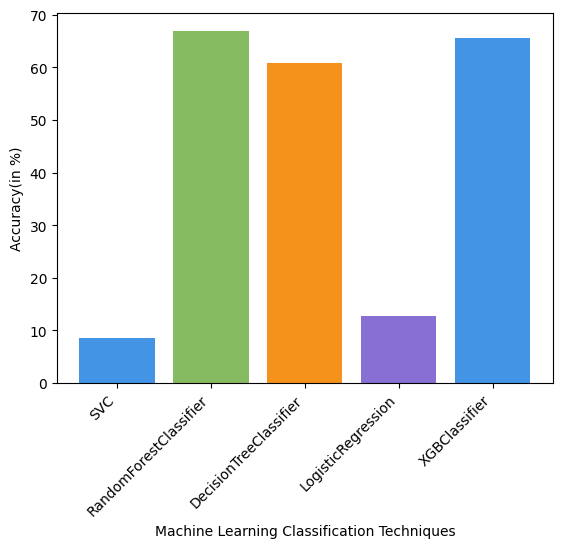

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the model names and accuracy values from the crop_results dictionary
model_names = list(crop_results.keys())
accuracy_values = list(crop_results.values())

# Create bars with different colors
plt.bar(model_names, accuracy_values, color=['#4394E5','#87BB62', '#F5921B', '#876FD4'])

# Create names on the x-axis
plt.xticks(model_names, model_names, rotation=45, ha='right') # Rotate x-axis labels for readability
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Classification Techniques')

# Show graph
plt.show()

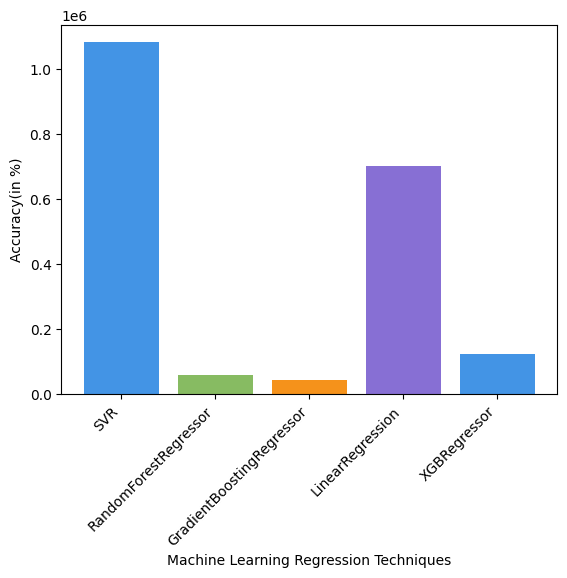

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the model names and accuracy values from the crop_results dictionary
model_names = list(yield_results.keys())
accuracy_values = list(yield_results.values())

# Create bars with different colors
plt.bar(model_names, accuracy_values, color=['#4394E5','#87BB62', '#F5921B', '#876FD4'])

# Create names on the x-axis
plt.xticks(model_names, model_names, rotation=45, ha='right') # Rotate x-axis labels for readability
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()